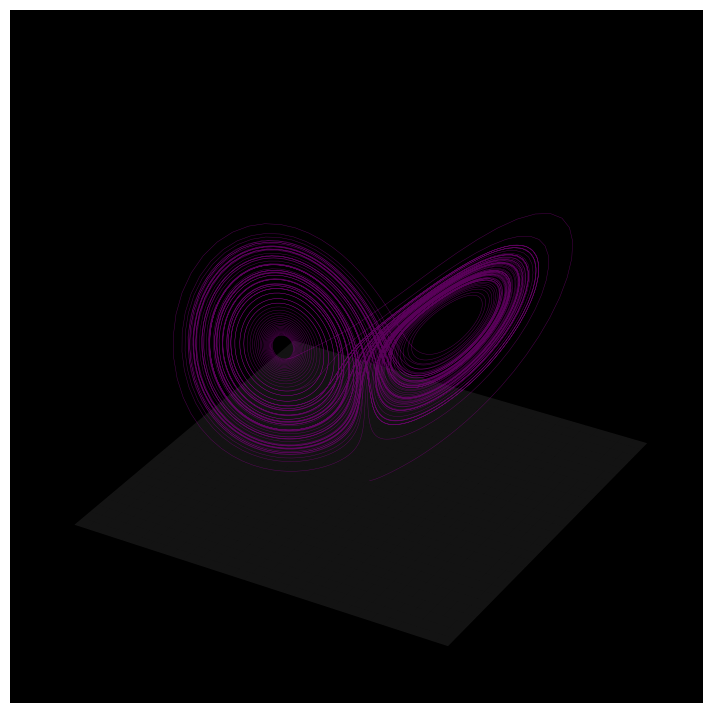

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import matplotlib.animation as animation
import seaborn as sns

sns.set()

# the same run from the previous example
initial_state = [0, 1, 0]

sigma = 10
rho = 28
beta = 8 / 3

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time * 100)

# define the lorenz system
def lorenz_system(current_state, t):
    x, y, z = current_state
    xdot = sigma * (y - x)
    ydot = x * (rho - z) - y
    zdot = x * y - beta * z
    return [xdot, ydot, zdot]  # returns the time derivatives

# use odeint() to solve a system of ordinary differential equations
# the arguments are:
# 1, a function - computes the derivatives
# 2, a vector of initial system conditions (aka x, y, z positions in space)
# 3, a sequence of time points to solve for
# returns an array of x, y, and z value arrays for each time point, with the initial values in the first row
xyz = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-30, 30))
ax.set_ylim((-30, 30))
ax.set_zlim((0, 50))    
ax.plot(x, y, z, color='purple', alpha=0.7, linewidth=0.3)
# ax.set_title('Lorenz attractor phase diagram')

plt.axis("off")
ax.set_facecolor("black")
# plt.grid(color="#000", linewidth=1)
# def animate(i):
#     ax.view_init(elev=i/10, azim=i)
#     return fig,

# anim = animation.FuncAnimation(fig, animate,
#                                frames=3600, interval=1)
# ax1 = fig.add_subplot(112, projection='3d')

xx, yy = np.meshgrid(range(-30, 31), range(-30, 31))
z = xx * 0 

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.1, linewidth=0, color='white')
# plt.show()
plt.show()

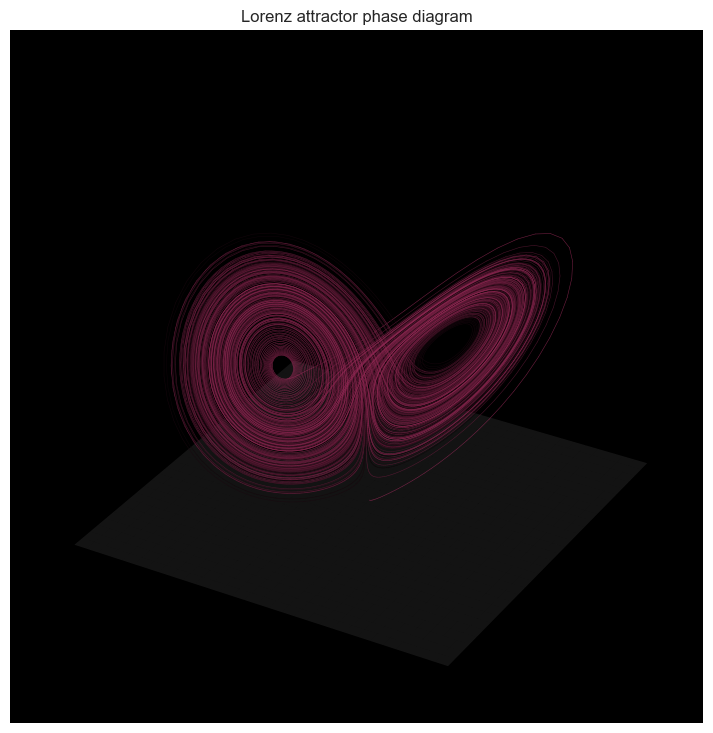

In [65]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.path as mpath
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from matplotlib import animation

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

initial_state = [0, 1, 0]

sigma = 10
rho = 28
beta = 8 / 3

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
# end_time = 500
end_time = 500
time_points = np.linspace(start_time, end_time, end_time * 100)

# define the lorenz system
def lorenz_system(current_state, t):
    x, y, z = current_state
    xdot = sigma * (y - x)
    ydot = x * (rho - z) - y
    zdot = x * y - beta * z
    return [xdot, ydot, zdot]  # returns the time derivatives

# use odeint() to solve a system of ordinary differential equations
# the arguments are:
# 1, a function - computes the derivatives
# 2, a vector of initial system conditions (aka x, y, z positions in space)
# 3, a sequence of time points to solve for
# returns an array of x, y, and z value arrays for each time point, with the initial values in the first row
xyz = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-30, 30))
ax.set_ylim((-30, 30))
ax.set_zlim((0, 50))
cols = get_color_gradient("#9f2c5c", "#00000", int(len(x) / 2)) + get_color_gradient("#000000", "#9f2c5c", len(x) - 1 - int(len(x) / 2))
# print(cols)
ax.set_facecolor("black")
plt.axis('off')
for i in range(len(x)-1):
    ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=cols[i], alpha=0.7, linewidth=0.4)
# for i in range(0, len(x)-1, 4):
#     ax.plot(x[i:i+5], y[i:i+5], z[i:i+5], color=cols[i], alpha=0.7, linewidth=0.3)
ax.set_title('Lorenz attractor phase diagram')

def animate(i):
    print(i)
    ax.view_init(elev=10., azim=i)
    return fig,


xx, yy = np.meshgrid(range(-30, 31), range(-30, 31))
z = xx * 0 

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.1, linewidth=0, color='white')

# anim = animation.FuncAnimation(fig, animate,
#                                frames=360, interval=1, blit=True)
# anim.save('something.gif')
fig.savefig("something.png", dpi=1200, bbox_inches='tight')
plt.show()

NameError: name 'save_folder' is not defined

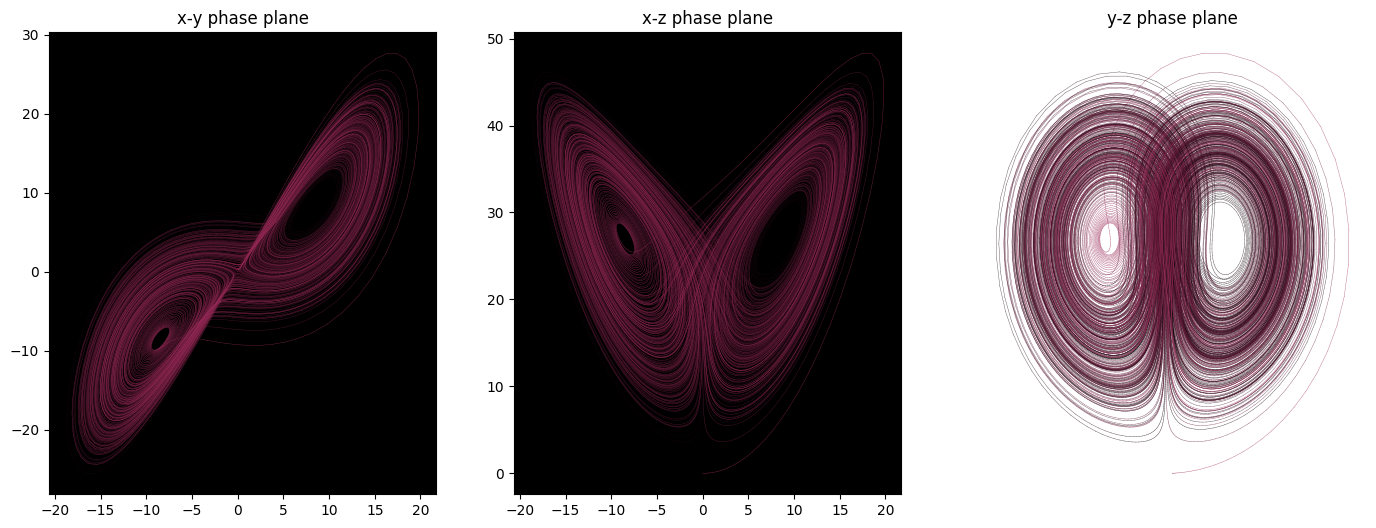

In [ ]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# plot the x values vs the y values
# ax[0].plot(x, y, color='purple', alpha=0.7, linewidth=0.3)
for i in range(len(x)-1):
    ax[0].plot(x[i:i+2], y[i:i+2], color=cols[i], alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane')

# plot the x values vs the z values
# ax[1].plot(x, z, color='purple', alpha=0.7, linewidth=0.3)
for i in range(len(x)-1):
    ax[1].plot(x[i:i+2], z[i:i+2], color=cols[i], alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane')

# plot the y values vs the z values
for i in range(len(x)-1):
    ax[2].plot(y[i:i+2], z[i:i+2], color=cols[i], alpha=0.7, linewidth=0.3)
# ax[2].plot(y, z, color='purple', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane')

ax[0].set_facecolor("black")
ax[1].set_facecolor("black")
ax[2].set_facecolor("black")
plt.axis('off')

fig.savefig('{}/lorenz-attractor-phase-plane.png'.format('images/lorenz'), 
            dpi=180, bbox_inches='tight')
plt.show()

In [5]:

from functools import reduce

# evaluates the polynomial p at point z
def horner(p, z):
    return reduce(lambda x, y: x * z + y, p)

def escapetime(p, z, R, K):
    k, zk = 1, z
    while k < K and abs(zk) <= R:
        zk = horner(p, zk)
        k += 1
    return k

In [7]:
from numpy import zeros # pip install numpy
from cv2 import imwrite # pip install opencv-python

def drawImage(filename, rgbfun, n):
    colormat = zeros((n, n, 3), dtype=float)
    for i in range(n):
        for j in range(n):
            rgb01 = rgbfun(i, j) # rgb(a) values in [0,1]
            for k in range(3):
                # assign bgr[k] value in {0, 1, ..., 255}
                colormat[i,j,k] = int(255 * rgb01[2-k])
    imwrite(filename, colormat)

In [8]:
from matplotlib import cm

def mapToComplexPlaneCenter(n, c, r, i, j):
    return c + r * complex(2 * j / n - 1, 2 * i / n - 1)

def drawEscapetimeMandelbrot(n, ctr, r, colormap, K):
    q = lambda c: [1, 0, c]
    
    def rgbfun(i, j):
        c = mapToComplexPlaneCenter(n, ctr, r, i, j)
        k = escapetime(q(c), 0, 2, K)
        return colormap(k/K) if k < K else (0,0,0)

    drawImage('escapetime_mandelbrot.png', rgbfun, n)
    
drawEscapetimeMandelbrot(
    2000, -0.8, 1.4, cm.hot, 80
)

In [9]:
from matplotlib import cm

# L > 1 should be as close to 1 as possible
def radiusJulia(poly, L=1.0000001):
    n = len(poly) - 1
    an = abs(poly[0])
    C = sum(map(abs, poly)) - an
    return max(1, 2 * C / 2, pow(2 * L / an, 1 / (n-1)))

def drawEscapetimeJulia(n, p, colormap, K):
    rp = radiusJulia(p)
    
    def rgbfun(i, j):
        z = mapToComplexPlaneCenter(n, 0, rp, i, j)
        k = escapetime(p, z, rp, K)
        return colormap(k/K) if k < K else (0,0,0)
    
    drawImage('escapetime_julia.png', rgbfun, n)
    
drawEscapetimeJulia(
    2000, [1, 0, -0.7508387093588403-0.046j],
    cm.inferno.reversed(), 250
)

In [10]:

from math import log2

def demMandelbrot(c, K):
    ck, dk = c, 1
    for _ in range(K):
        dk = 2 * ck * dk + 1
        ck = ck * ck + c
    if abs(ck) <= 2: return 0
    return log2(abs(ck)) * abs(dk) / abs(dk)

In [11]:
from math import log2
from numpy import zeros, nan
from matplotlib.colors import Normalize

def demMandelbrot(c, K, overflow):
    ck, dk = c, 1
    for _ in range(K):
        if max(
            abs(ck.real), abs(ck.imag),
            abs(dk.real), abs(dk.imag)
        ) > overflow: break # so computer doesn't crash
        dk *= 2 * ck
        dk += 1
        ck *= ck
        ck += c
    absck = abs(ck)
    if absck <= 2: return 0
    else:
        absdk = abs(dk)
        if absdk == 0: return nan # this will probably never happen
        estimate = log2(absck) * absck / absdk
        return -log2(estimate)

def drawDemMandelbrot(n, ctr, r, colormap, K, overflow):
    arr = zeros((n, n), dtype=float)
    
    for i in range(n):
        for j in range(n):
            c = mapToComplexPlaneCenter(n, ctr, r, i, j)
            arr[i,j] = demMandelbrot(c, K, overflow)

    m, M = arr.min(), arr.max()
    arr[arr == 0] = M # 0 only denotes the inner set and it could spoil our normalization
    arr[arr == nan] = m # we don't care, this happens too rarely, if at all
    colortable = colormap(Normalize(m, M)(arr))
    
    def rgbfun(i, j):
        if arr[i,j] == M: return (0,0,0)
        else: return colortable[i,j]

    drawImage('demMandelbrot.png', rgbfun, n)

drawDemMandelbrot(
    2000, -0.8, 1.4, 
    cm.magma.reversed(), 
    50, 10**20
)

In [12]:
from math import log2

def demJulia(p, dp, z, K, R):
    zk, dk = z, 1
    for _ in range(K):
        dk = horner(dp, zk) * dk
        zk = horner(p, zk)
    if abs(zk) < R: return 0
    return log2(abs(zk)) * abs(zk) / abs(dk)

In [13]:
from math import log2
from numpy import zeros, nan
from matplotlib.colors import Normalize

# derivative of the given polynomial
def differentiate(poly):
    n = len(poly) - 1
    return [(n - i) * an for (i, an) in enumerate(poly[:-1])]

def demJulia(p, dp, z, K, R, overflow):
    zk, dk = z, 1
    for _ in range(K):
        if max(
            abs(zk.real), abs(zk.imag),
            abs(dk.real), abs(dk.imag)
        ) > overflow: break
        dk = horner(dp, zk) * dk
        zk = horner(p, zk)
    abszk = abs(zk)
    if abszk < R: return 0
    else:
        absdk = abs(dk)
        if absdk == 0: return nan
        estimate = log2(abszk) * abszk / absdk
        return -log2(estimate)

def drawDemJulia(n, p, colormap, K, pow_, overflow):
    arr = zeros((n, n), dtype=float)
    dp = differentiate(p)
    r = radiusJulia(p)

    for i in range(n):
        for j in range(n):
            z = mapToComplexPlaneCenter(n, 0, r, i, j)
            arr[i,j] = demJulia(p, dp, z, K, r, overflow)

    m, M = arr.min(), arr.max()
    arr[arr == 0] = M
    arr[arr == nan] = M
    normalized = Normalize(m, M)(arr)
    adjusted = pow(normalized, pow_) # explained below
    colortable = colormap(adjusted)
            
    def rgbfun(i, j):
        if arr[i,j] == M: return (0,0,0)
        else: return colortable[i,j]

    drawImage('demJulia.png', rgbfun, n)
    
drawDemJulia(
    2000, [1, 0, -0.760+0.0698j], 
    cm.cubehelix.reversed(), 
    500, 0.8, 10**20
)